In [65]:
# run models notebook -- similar to import
%run data_preprocessing.ipynb
%run models.ipynb

In [66]:
from sklearn.metrics import confusion_matrix as conf_mat
import itertools

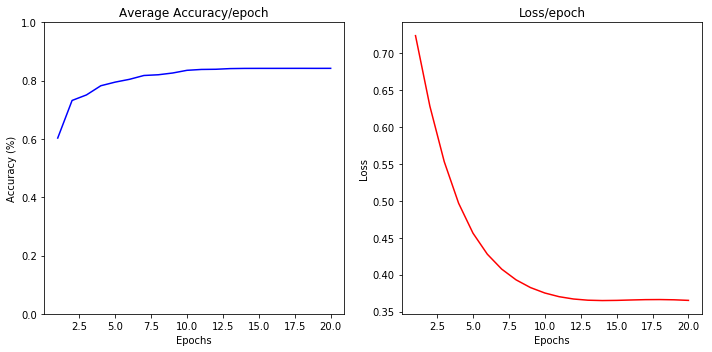

In [68]:
# training different linear models
## baseline model
model, variables = create_linear_classifier(num_features,num_labels,"Adam","multi-label")
train_model(training_input,training_output,model,variables, learning_rate = 0.1, epochs = 20)

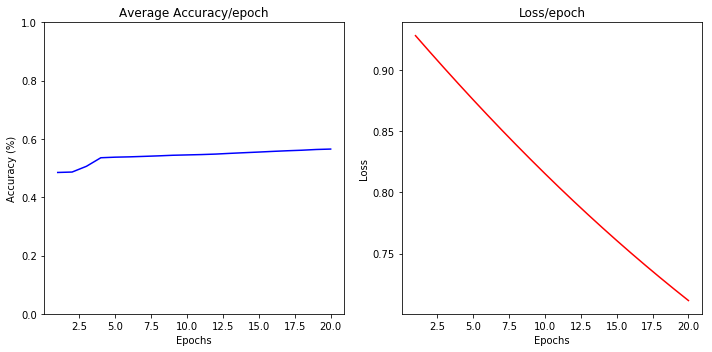

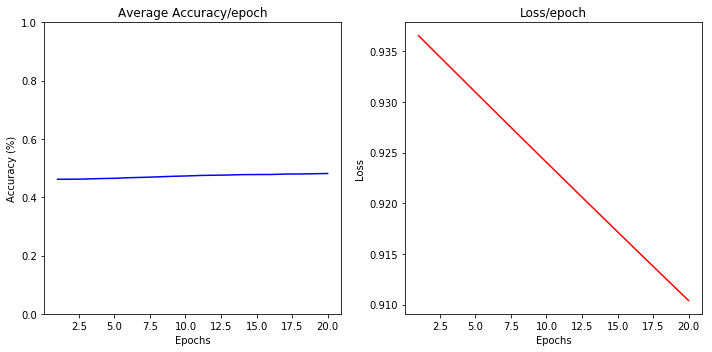

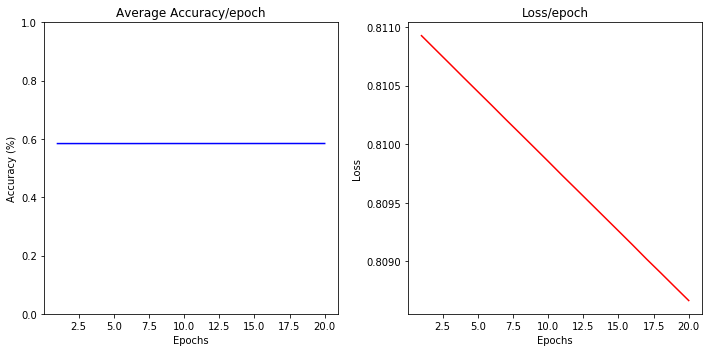

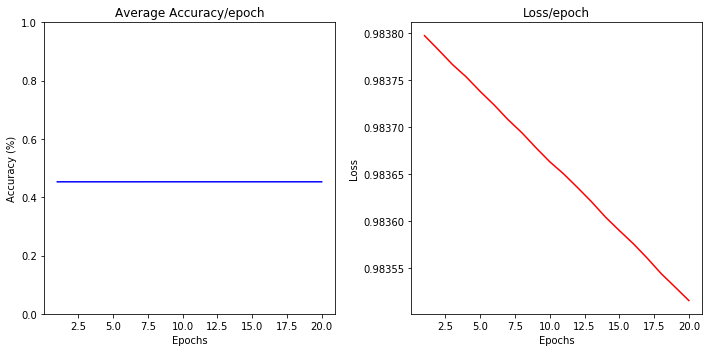

In [69]:
# vary learning rate

## learning rate = 0.01
train_model(training_input,training_output,model,variables,learning_rate = 0.01, epochs=20)

## learning rate = 0.001
train_model(training_input,training_output,model,variables,learning_rate = 0.001, epochs=20)

## learning rate = 0.0001
train_model(training_input,training_output,model,variables,learning_rate = 0.0001, epochs=20)

## learning rate = 0.00001
train_model(training_input,training_output,model,variables,learning_rate = 0.00001, epochs=20)

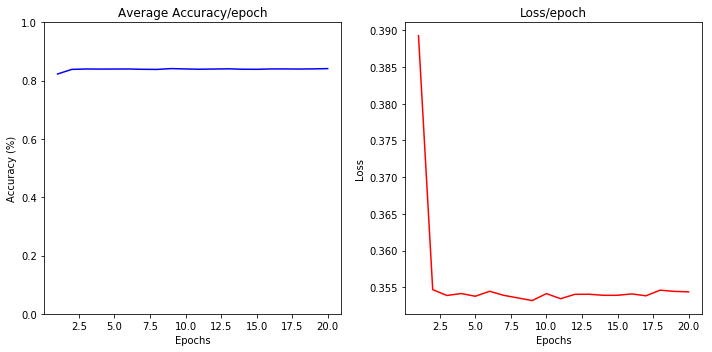

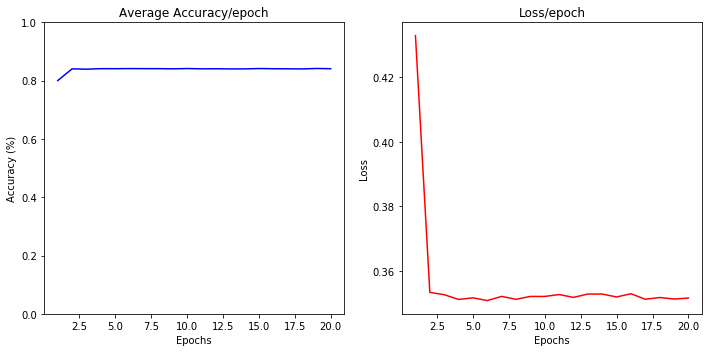

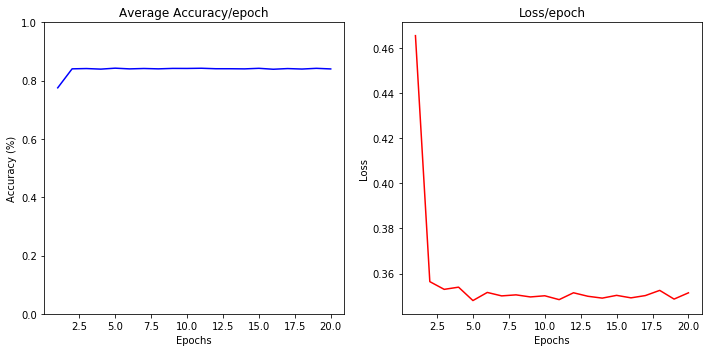

In [70]:
# vary batch size

## size = 32
train_model(training_input,training_output,model,variables,learning_rate = 0.1, epochs=20, batch_size = 32)

## size = 64
train_model(training_input,training_output,model,variables,learning_rate = 0.1, epochs=20, batch_size = 64)

## size = 128
train_model(training_input,training_output,model,variables,learning_rate = 0.1, epochs=20, batch_size = 128)

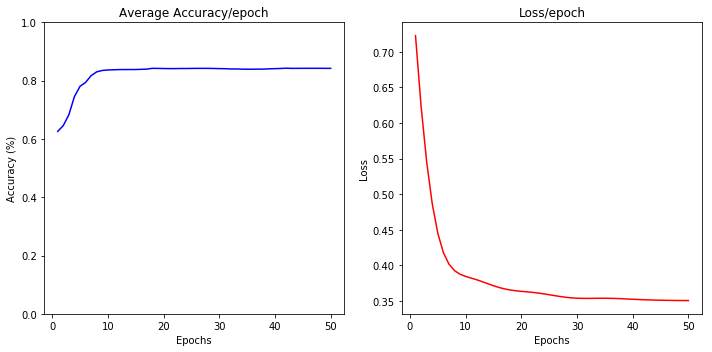

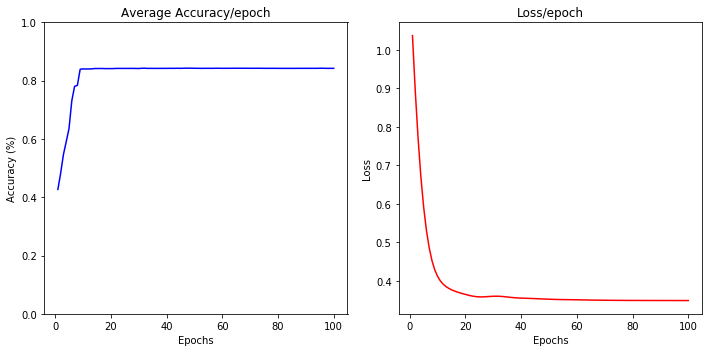

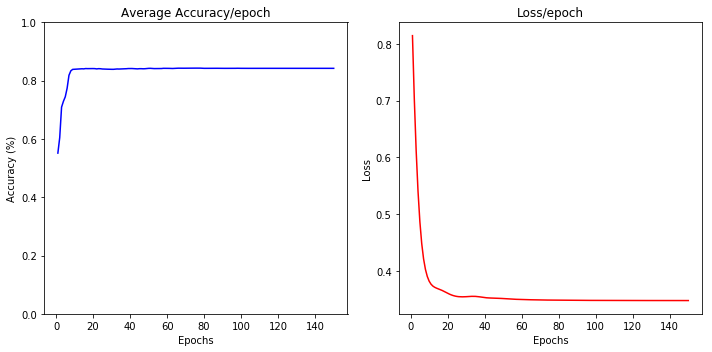

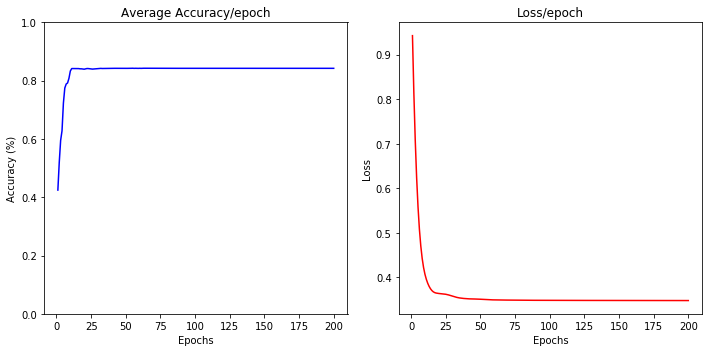

In [71]:
# vary epochs

## epochs = 50
train_model(training_input,training_output,model,variables,learning_rate = 0.1, epochs=50)

## epochs = 100
train_model(training_input,training_output,model,variables,learning_rate = 0.1, epochs=100)

## epochs = 150
train_model(training_input,training_output,model,variables,learning_rate = 0.1, epochs=150)

## epochs = 200
train_model(training_input,training_output,model,variables,learning_rate = 0.1, epochs=200)

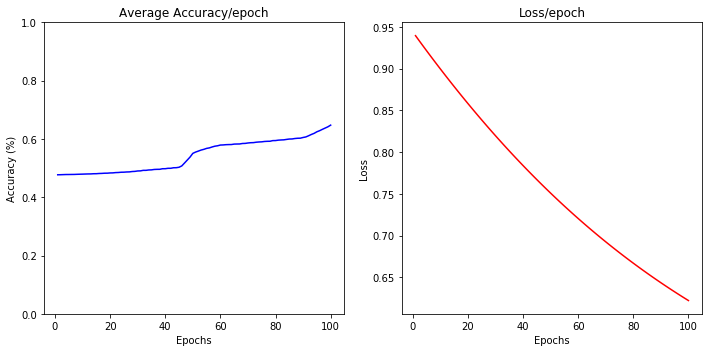

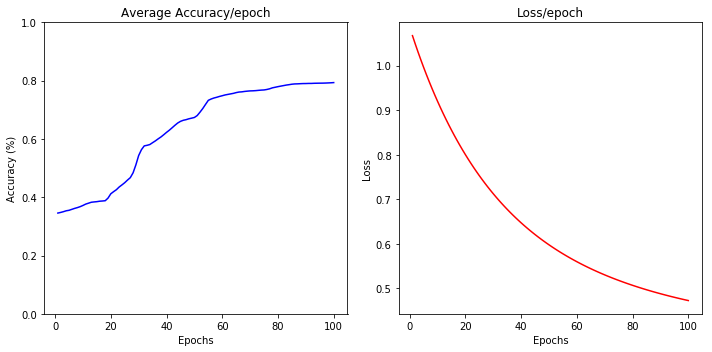

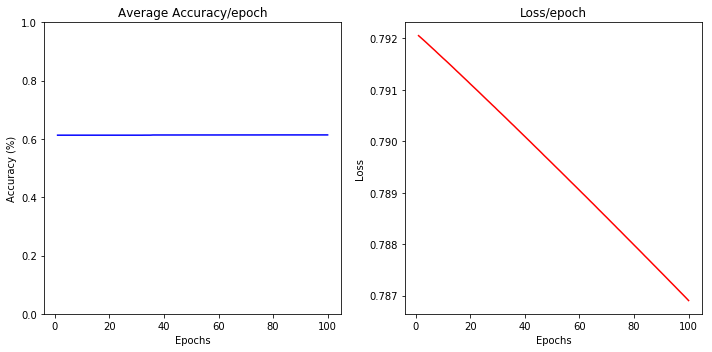

In [72]:
# vary optimizer

## Gradient Descent
model, variables = create_linear_classifier(num_features,num_labels,"GD","multi-label")
train_model(training_input,training_output,model,variables,learning_rate = 0.1, epochs=100)

## Adagrad
model, variables = create_linear_classifier(num_features,num_labels,"Adagrad","multi-label")
train_model(training_input,training_output,model,variables,learning_rate = 0.1, epochs=100)

## Adadelta
model, variables = create_linear_classifier(num_features,num_labels,"Adadelta","multi-label")
train_model(training_input,training_output,model,variables,learning_rate = 0.1, epochs=100)

Part 1 Conclusion: it appears that the best accuracy that any model converges on is 80%, which is quickly reached when batching (using a batch size between 32 and 128). Adam seems to be the best optimizer for this data, with Adagrad coming in second. Epochs can be on the lower end, as the model converges quickly. Learning rate should not be lowered from the baseline model (0.1). That being said, let's see the results in action.

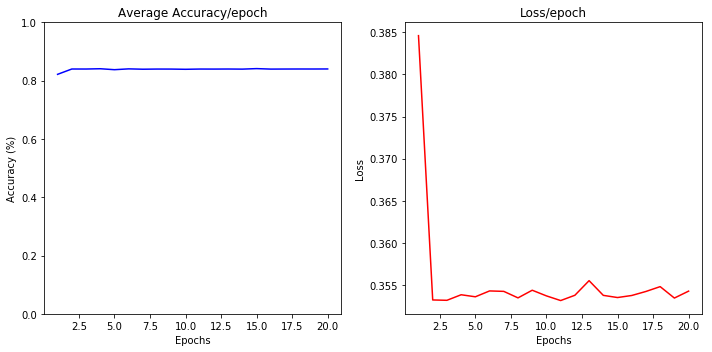

In [73]:
## learning rate = 0.1, batch size = 32, epochs = 20, optimizer = Adam
model, variables = create_linear_classifier(num_features,num_labels,"Adam","multi-label")
save = "D:\\noush\\PycharmProjects\\Accidental-Death-ML\\linear model\\trained_linear_model"
train_model(training_input,training_output,model,variables, learning_rate = 0.1, epochs = 20,batch_size = 32,save_path = save)

Time to test:

In [74]:
restore_paths = {
    "metagraph": "D:\\noush\\PycharmProjects\\Accidental-Death-ML\\linear model\\trained_linear_model.meta",
    "checkpoint": "D:\\noush\\PycharmProjects\\Accidental-Death-ML\\linear model\\trained_linear_model"
}
predictions, accuracy, loss = test_model(test_input,test_output, variables, restore_paths)
print(predictions)
print("accuracy", accuracy)
print("loss",loss)

INFO:tensorflow:Restoring parameters from D:\noush\PycharmProjects\Accidental-Death-ML\linear model\trained_linear_model


[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
accuracy 0.8364389
loss 0.36291012


Part 2: Evaluate performance. I will use a confusion matrix to highlight what the model got right, what it got wrong/should have predicted, etc.

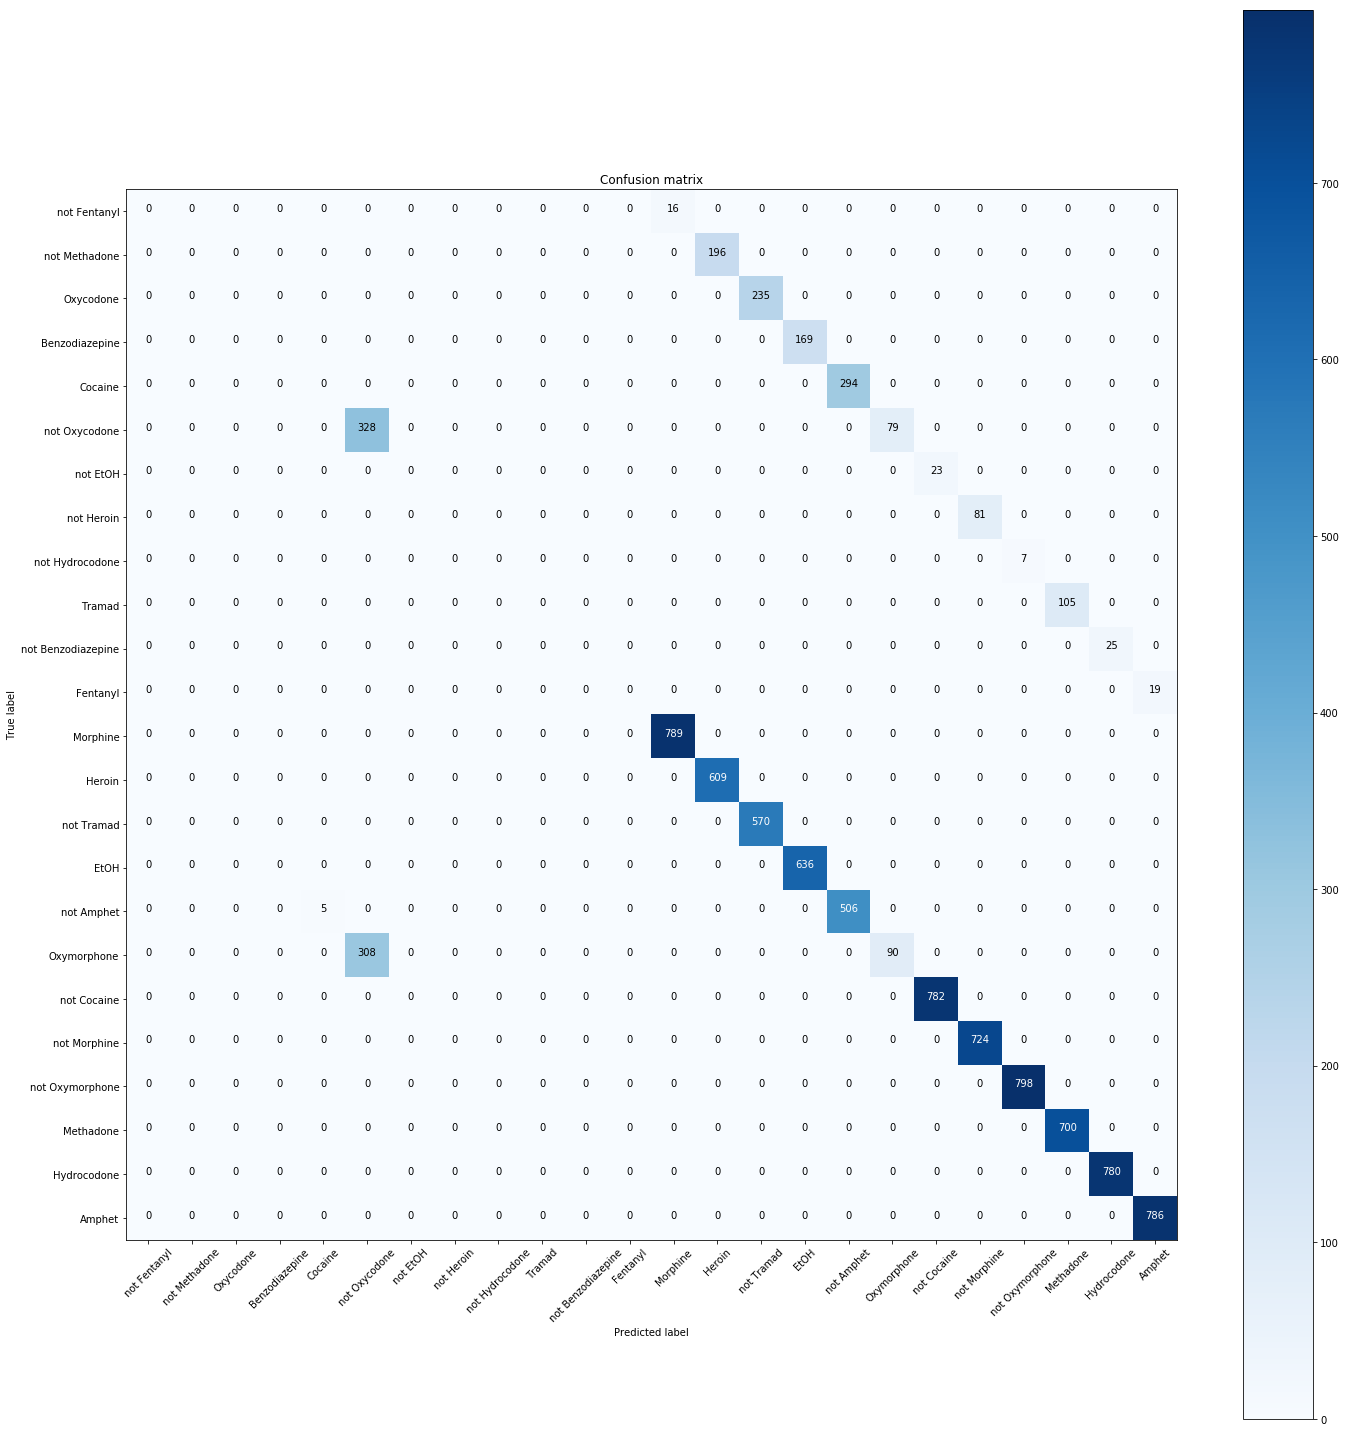

In [75]:
# decode predictions and real values
decoded_preds = []
classes = set([])
for pred in predictions:
    for drug in range(len(drug_names)):
        decoded_pred = drug_names[drug] if pred[drug] == 1 else "not "+drug_names[drug]
        decoded_preds.append(decoded_pred)
        classes.add(decoded_pred)

decoded_y_test = []
for record in test_output:
    for drug in range(len(drug_names)):
        decoded_y = drug_names[drug] if record[drug] == 1 else "not "+drug_names[drug]
        decoded_y_test.append(decoded_y)
        classes.add(decoded_y)

# plotting the confusion matrix-- from the docs        
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    fig = plt.figure(figsize = (20,20))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = conf_mat(decoded_y_test,decoded_preds)
plot_confusion_matrix(cm,classes=classes)

Due to the multi-label nature of the classification tastk, the confusion matrix ended up being big because, for each drug, I had to include the "not" of the drug to make sure each set of predictions lined up with each set of ground truth values. High values along the diagonal of the matrix are a good sign, since the diagonal cells are correct predictions. However, above the trace, there seems to be a faint line of incorrect predictions. Overall, the linear classifier seems strong in it's training and testing performance. 